# 1. Importing required liraries

In [9]:
import pandas as pd
import numpy as np
import pickle
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 2. Loading the test data

In [10]:
# Load test data
X_test_df = pd.read_csv('../data/X_test.csv')
y_test_df = pd.read_csv('../data/y_test.csv')
y_true = y_test_df.values.ravel()

# Load scaler
with open("model/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

X_test_scaled = scaler.transform(X_test_df)


# 3. Loading both the models(ANN model and Random forest model)

In [11]:
# Load ANN model
ann_model = load_model("model/ann_model.h5")

# Load Random Forest model
rf_model = joblib.load("model/random_forest_model.pkl")


# 4. ANN prediction and random forest  predictions

In [15]:
# ANN Predictions
y_pred_ann = ann_model.predict(X_test_scaled).flatten()
r2_ann = r2_score(y_true, y_pred_ann)
mae_ann = mean_absolute_error(y_true, y_pred_ann)
mse_ann = mean_squared_error(y_true, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)

# RF Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
r2_rf = r2_score(y_true, y_pred_rf)
mae_rf = mean_absolute_error(y_true, y_pred_rf)
mse_rf = mean_squared_error(y_true, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)


7/7 [==============================] - 0s 2ms/step


# 5. ANN and Random forest evaluation metrics

In [13]:
print("📊 ANN Model Evaluation Metrics:")
print(f"R² Score: {r2_ann:.4f}")
print(f"MAE: {mae_ann:.4f}")
print(f"MSE: {mse_ann:.4f}")
print(f"RMSE: {rmse_ann:.4f}")

print("\n📊 Random Forest Model Evaluation Metrics:")
print(f"R² Score: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")


📊 ANN Model Evaluation Metrics:
R² Score: 0.8436
MAE: 5.0024
MSE: 40.2961
RMSE: 6.3479

📊 Random Forest Model Evaluation Metrics:
R² Score: 0.8837
MAE: 3.7478
MSE: 29.9661
RMSE: 5.4741


# 6. Comparison through matplotlib

C:\Users\DELL\AppData\Local\Temp\ipykernel_21420\3073600777.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\anaconda3\envs\civil\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


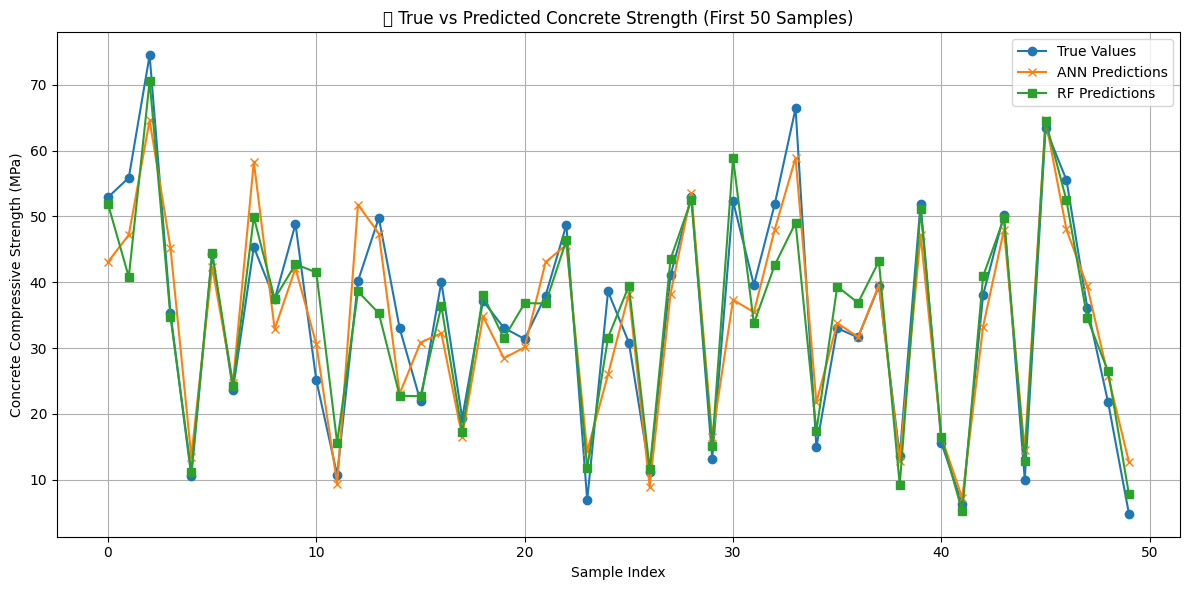

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(y_true[:50], label="True Values", marker='o')
plt.plot(y_pred_ann[:50], label="ANN Predictions", marker='x')
plt.plot(y_pred_rf[:50], label="RF Predictions", marker='s')

plt.title("🔍 True vs Predicted Concrete Strength (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Concrete Compressive Strength (MPa)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
